In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [43]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
le = LabelEncoder()
train_data['Salary'] = le.fit_transform(train_data['Salary'])
test_data['Salary'] = le.transform(test_data['Salary'])

In [45]:
all_data = pd.concat([train_data,test_data],axis=0)

<Axes: xlabel='hoursperweek', ylabel='Count'>

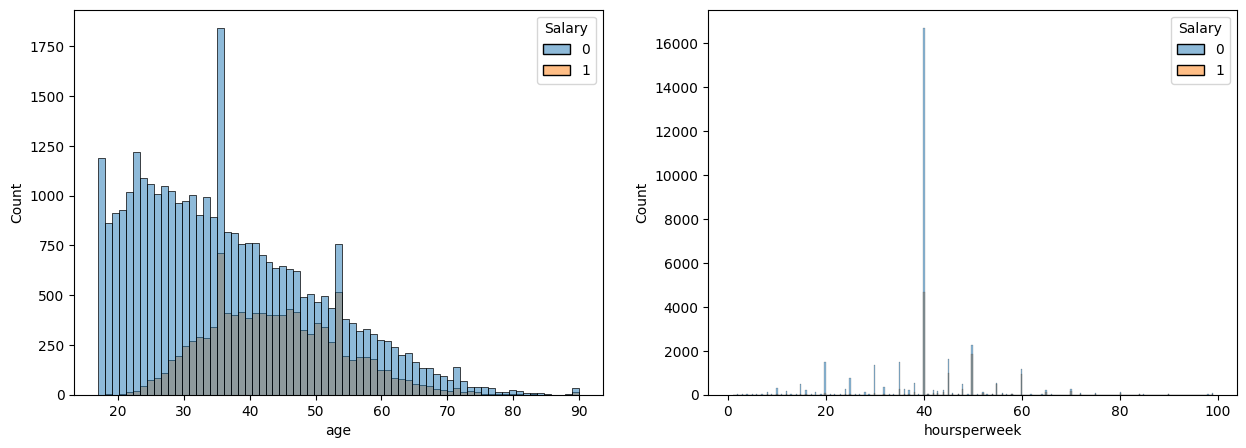

In [46]:
figs, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.histplot(data=all_data,x='age',hue='Salary',ax=axes[0])
sns.histplot(data=all_data,x='hoursperweek',hue='Salary',ax=axes[1])

In [51]:
def plot_by_percentage(column,figsize=(8,5)):
    percentage = all_data.groupby(column)['Salary'].mean()*100
    plt.figure(figsize=figsize)
    sns.barplot(y=percentage.index, x=percentage.values)

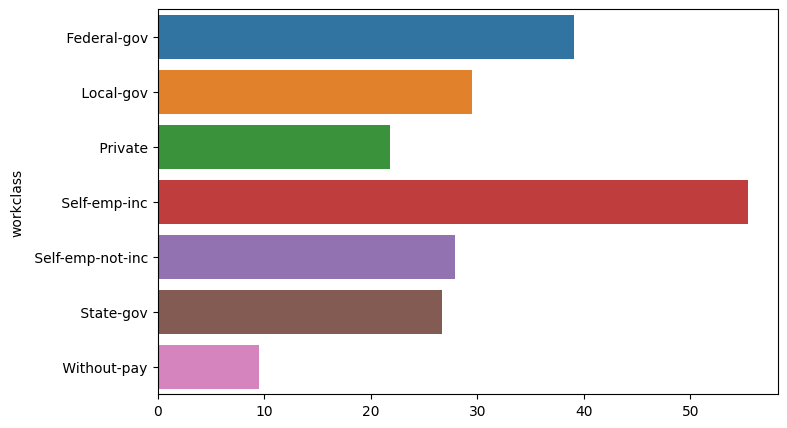

In [52]:
plot_by_percentage('workclass')

<Axes: xlabel='count', ylabel='workclass'>

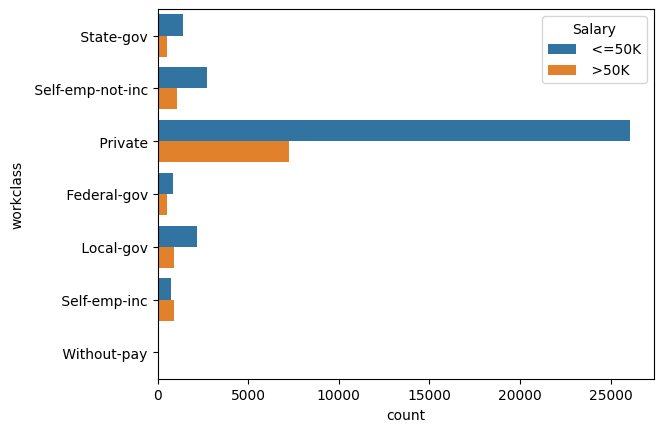

In [14]:

sns.countplot(data=all_data, y='workclass', hue='Salary')

<Axes: xlabel='count', ylabel='education'>

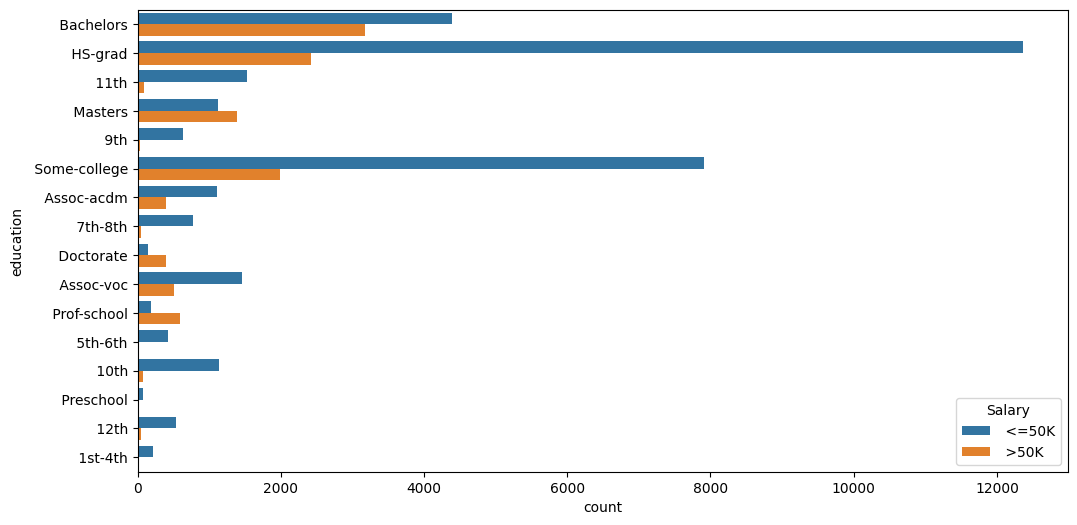

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=all_data, y='education', hue='Salary')

<Axes: xlabel='count', ylabel='maritalstatus'>

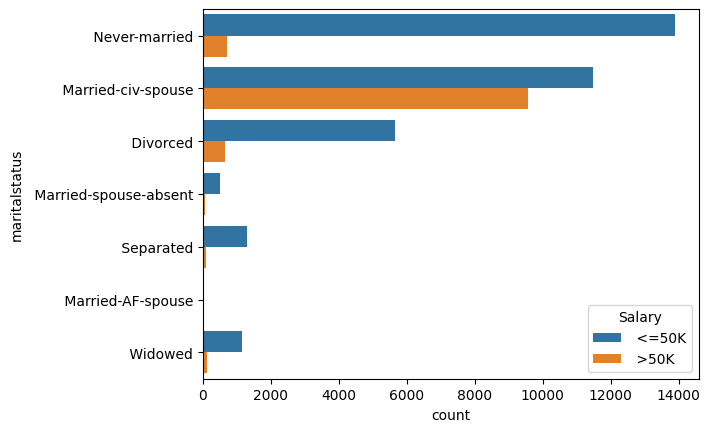

In [18]:
sns.countplot(data=all_data, y='maritalstatus', hue='Salary')

<Axes: xlabel='count', ylabel='occupation'>

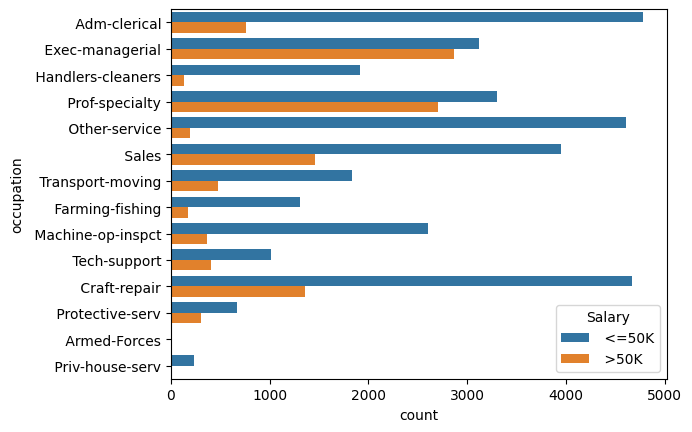

In [19]:
sns.countplot(data=all_data, y='occupation', hue='Salary')

In [30]:
train_data.drop('education',axis=1,inplace=True)
test_data.drop('education',axis=1,inplace=True)

In [31]:
for col in ['workclass','maritalstatus','occupation','relationship','race','sex','native']:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [32]:
x_train, x_test = train_data.drop('Salary',axis=1), test_data.drop('Salary',axis=1)
y_train, y_test = train_data['Salary'], test_data['Salary']

In [33]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
np.mean(y_test==y_pred)

0.7749667994687915